# 1. Import Data

In [ ]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
## Load Data
df = pd.read_excel("/content/DATA SMP.xlsx")
df.head()

,Provinsi,Rasio Siswa/Sekolah,Persentase Perpustakaan,APK,APM,Jumlah Putus Sekolah
0,D.K.I. Jakarta,324.458256,2.913932,89.89,84.22,272
1,Jawa Barat,305.834506,13.129896,93.46,82.80,1217
2,Jawa Tengah,349.476986,9.019691,94.05,81.02,464
3,D.I. Yogyakarta,295.203991,1.230680,94.02,85.28,14
4,Jawa Timur,247.343655,11.584268,95.95,83.80,1792


# 2. Uji Asumsi

In [ ]:
df_kmeans = df.drop(['Provinsi'],axis=1)
df_kmeans.head()

,Rasio Siswa/Sekolah,Persentase Perpustakaan,APK,APM,Jumlah Putus Sekolah
0,324.458256,2.913932,89.89,84.22,272
1,305.834506,13.129896,93.46,82.80,1217
2,349.476986,9.019691,94.05,81.02,464
3,295.203991,1.230680,94.02,85.28,14
4,247.343655,11.584268,95.95,83.80,1792


In [ ]:
#uji KMO
!pip install factor_analyzer

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_kmeans)
kmo_model

0.579084447646863

In [ ]:
#uji multikolinieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = add_constant(df_kmeans)
multikolinieritas=pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)
multikolinieritas = multikolinieritas.drop(['const'], axis=0)
print(multikolinieritas)

Rasio Siswa/Sekolah        1.453129
Persentase Perpustakaan    3.619302
APK                        2.062083
APM                        2.164395
Jumlah Putus Sekolah       3.219571
dtype: float64


# 3. Data Preprocessing

In [ ]:
df_kmeans.head()

,Rasio Siswa/Sekolah,Persentase Perpustakaan,APK,APM,Jumlah Putus Sekolah
0,324.458256,2.913932,89.89,84.22,272
1,305.834506,13.129896,93.46,82.80,1217
2,349.476986,9.019691,94.05,81.02,464
3,295.203991,1.230680,94.02,85.28,14
4,247.343655,11.584268,95.95,83.80,1792


In [ ]:
##Standarisasi data
sc_df_kmeans = StandardScaler()
dfa_std = sc_df_kmeans.fit_transform(df_kmeans.astype(float))

In [ ]:
dfa_std

array([[ 1.51114345e+00, -9.35177945e-03, -1.31659945e-01,
         9.00980624e-01, -3.07710349e-01],
       [ 1.26400844e+00,  3.49729832e+00,  7.28452227e-01,
         6.67602521e-01,  1.90904605e+00],
       [ 1.84313912e+00,  2.08646215e+00,  8.70599616e-01,
         3.75058139e-01,  1.42678252e-01],
       [ 1.12294273e+00, -5.87131433e-01,  8.63371783e-01,
         1.07519245e+00, -9.12920032e-01],
       [ 4.87841588e-01,  2.96675851e+00,  1.32836240e+00,
         8.31953298e-01,  3.25786608e+00],
       [-6.88793611e-01,  7.15010337e-02,  1.10429956e+00,
         1.55674022e+00,  8.63796765e-02],
       [ 3.22379005e-01,  1.17891204e+00, -3.04702780e-02,
         5.09825776e-01,  2.96229856e+00],
       [ 3.38899377e-01, -2.31924130e-01,  5.14026503e-01,
         2.00604624e-02, -2.20916713e-01],
       [-6.34506260e-02, -5.75000839e-02,  9.66970728e-01,
         2.78091181e-01,  2.22434566e-01],
       [-5.61887265e-01, -4.37235768e-01, -6.25561893e-01,
         1.95915793e-01

# 4. Penentuan K Optimum

In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

In [ ]:
#Menentukan K optimal dengan Metode Silhouette
# A list holds the silhouette coefficients for each k
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(dfa_std)
  score = silhouette_score(dfa_std, kmeans.labels_)
  silhouette_coefficients.append(score)

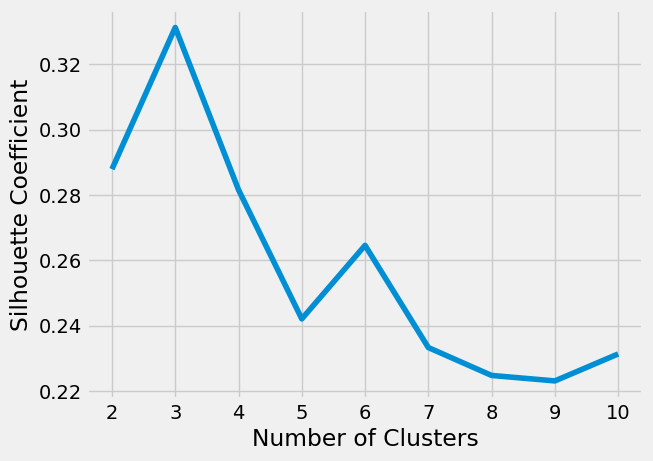

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# 5. K-Means Clustering

In [ ]:
## Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.inertia_

72.5061992174021

In [ ]:
#Menampilkan nilai Centroid yang di generate oleh algoritma
kmeans.cluster_centers_

array([[-0.65477731, -0.36847681, -0.78141205, -0.78649097, -0.19159454],
       [ 0.46850492, -0.273843  ,  0.68611777,  0.7285297 , -0.37188402],
       [ 0.97934204,  2.43235776,  0.72423599,  0.59610993,  2.06797223]])

In [ ]:
kmeans.n_iter_

7

In [ ]:
kmeans.labels_

array([1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
labels = kmeans.labels_
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Rasio Siswa/Sekolah','Persentase Perpustakaan','APK','APM','Jumlah Putus Sekolah'])
new_dfa['label_kmeans'] = labels

In [ ]:
new_dfa.head()

,Rasio Siswa/Sekolah,Persentase Perpustakaan,APK,APM,Jumlah Putus Sekolah,label_kmeans
0,1.511143,-0.009352,-0.131660,0.900981,-0.307710,1
1,1.264008,3.497298,0.728452,0.667603,1.909046,2
2,1.843139,2.086462,0.870600,0.375058,0.142678,2
3,1.122943,-0.587131,0.863372,1.075192,-0.912920,1
4,0.487842,2.966759,1.328362,0.831953,3.257866,2


# 6. Cluster Validation

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
silhouette_score(dfa_std, kmeans.labels_)

0.33132294084330977

In [ ]:
davies_bouldin_score(dfa_std, kmeans.labels_)

0.9779401421322245

Semakin kecil nilai DBI atau semakin mendekati nilai 0 menunjukkan seberapa baik cluster yang diperoleh, sehingga nilai DBI yang telah diperoleh tersebut menunjukkan cluster dihitung dalam penerapan ini masih belum cukup bagus.